#Exercícios Ciclo 02

A base de dados foi extraída do Kaggle [New York City Airbnb Open Data](https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data)

1. Qual é o intervalo de variação do preço dos alugueis dos imóveis?


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


O intervalo de vairação máximo de preços de nossa tabela é de US$ 1948.00, sendo o minmimo encontrafdo de US$ 51 e o maior valor de US$ 1999. Já o preço médio é de 160.54 +/- 136.98.


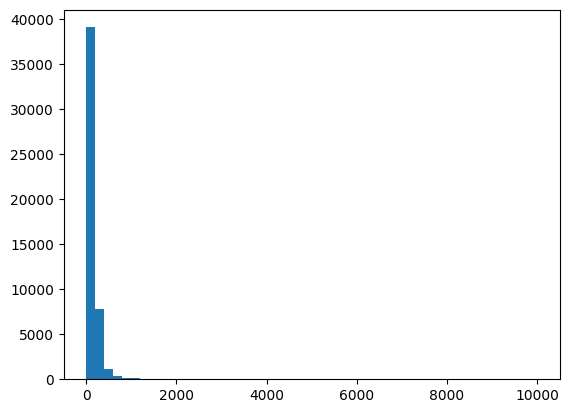

In [96]:
# Tazer os dados para um dataframe

open_data = pd.read_csv('/content/AB_NYC_2019.csv')

# Verificar a estrutura básica do dataset - nossa coluna alvo é 'price'
# open_data.columns retorna Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
# 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365'], dtype='object')

# plotagem de histogram, a fim de localizar os outliersd da coluna price

plt.hist(open_data['price'], bins = 50)

# Filtragem de valores, extraindo os valores menores que 50 dolares (assim se evitam os zeros) e maiores que 2 mil dorlares (outliers, e minorias conforme histograma)

filtragem  = (open_data['price'] > 50) & (open_data['price'] < 2000)
prices = open_data.loc[filtragem, 'price']

#valor mínimo, valor máximo e variação

prices_minimo = prices.min()
prices_maximo = prices.max()
prices_media =  prices.mean()
prices_std =  prices.std()

variacao = prices_maximo - prices_minimo

print(f"O intervalo de vairação máximo de preços de nossa tabela é de US$ {variacao:.2f}, sendo o minmimo encontrafdo de US$ {prices_minimo} e o maior valor de US$ {prices_maximo}. Já o preço médio é de {prices_media:.2f} +/- {prices_std:.2f}.")


2. Qual a distribuição dos imóveis de acordo com o número mínimo de
pernoites que podem ser agendado?

A distribuição dos pernoite seria a seguinte: 1       12720
2       11696
3        7999
4        3303
5        3034
        ...  
480         1
500         5
999         3
1000        1
1250        1
Name: minimum_nights, Length: 109, dtype: int64


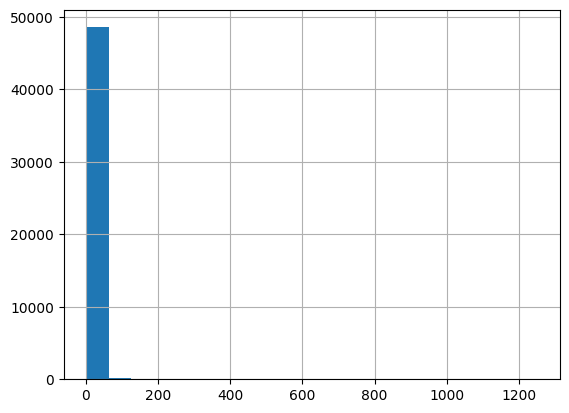

In [97]:
# Aqui a distribuição dos imóveis seria de acordo com a coluna "minimum_nights", e fica melhor repseeentada num grafico]

open_data['minimum_nights'].hist(bins=20)

# Verifica os valores minimos de pernoite (1) e máximos (1250) da série. Pode-se ver que acima de 200 claramente outliersd

open_data['minimum_nights'].min()
open_data['minimum_nights'].max()

# numericamente aa serie seria

distribuicao_pernoites = open_data['minimum_nights'].value_counts().sort_index()

print(f'A distribuição dos pernoite seria a seguinte: {distribuicao_pernoites}')

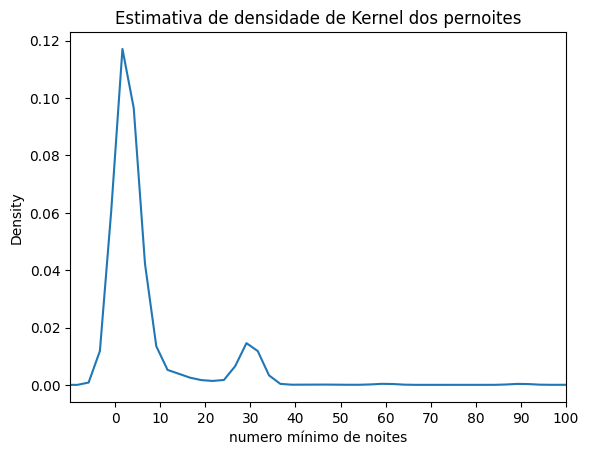

Por este gráfico podemos delimitrar que a maior densidade de numero mínimo de pernoites está  entre 1 e 10 dias, tendo uma pequeno acumulado no entorno de trinta dias, refererindo-se a luguéis mensais.


In [91]:
# Aqui, um grafico mais detalhado, e levando em conta a maior concentração na primeira faixa do gráfico anterior.

open_data['minimum_nights'].plot(kind='kde')
plt.xlim(-10, 100)
plt.xticks(range(0,  101,  10))
plt.xlabel('numero mínimo de noites')
plt.ylabel('Density')
plt.title('Estimativa de densidade de Kernel dos pernoites')
plt.show()

print('Por este gráfico podemos delimitrar que a maior densidade de numero mínimo de pernoites está  entre 1 e 10 dias, tendo uma pequeno acumulado no entorno de trinta dias, refererindo-se a luguéis mensais.')

3 . Qual a média e a mediana de imóveis cadastrado por host (dono do imóvel)?

In [101]:
# Aqui a coluna referência será  'calculated_host_listings_count'. Como são "imoveis cadastrados por host", há a necessidade de agrupá-lo, para depois cfazer-se os cálculos.

media_imoveis_por_host = open_data.loc[:, 'calculated_host_listings_count'].mean()
mediana_imoveis_por_host = open_data.loc[:, 'calculated_host_listings_count'].median()

print(f"A média de imóveis por host no cadastro é de {media_imoveis_por_host:.2f} e a mediana é de {mediana_imoveis_por_host}.")

A média de imóveis por host no cadastro é de 7.14 e a mediana é de 1.0.


4. Como você interpretaria o seguinte histograma?

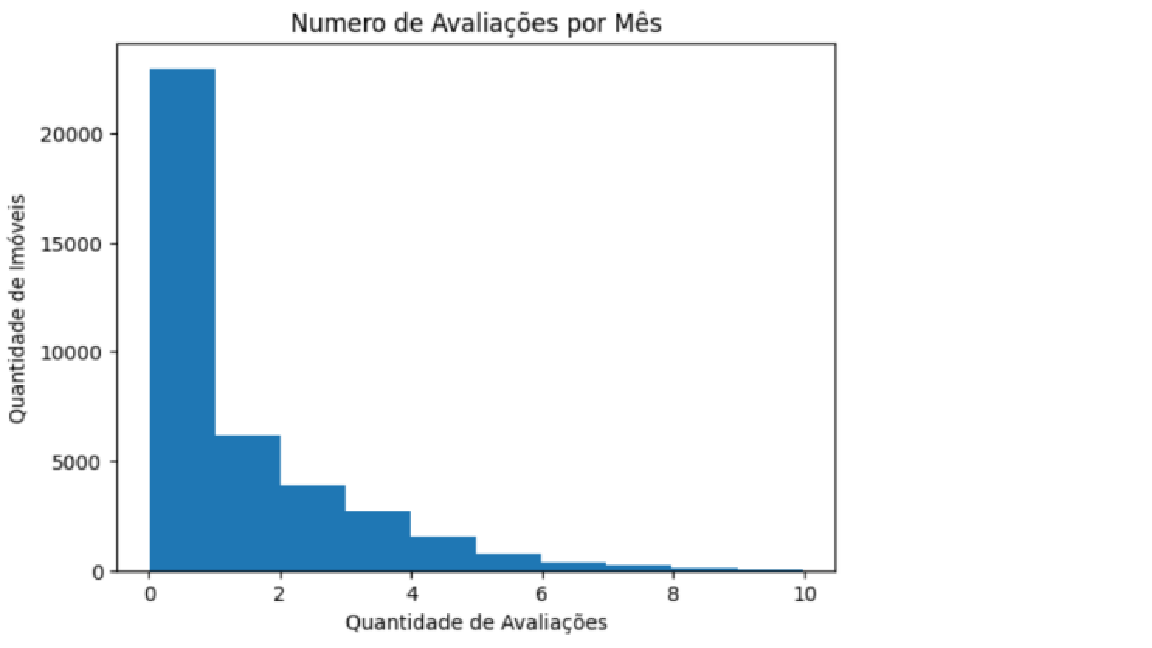

O histograma acima refere-se a correlação de quantidade de avaliações por mês dos imóveis, e podemos notar que a maiorita das avaliações por mês concentra-se em imóveis com uma ou duas avaliações, tendo uma queda drástica para a faixa de 3 e 4 avaliaçãoes. Isso pode indicar que a maioria dos imóveis pode ser locados poucas vezes, seja porque ao tempo de locação é alto (e consequentemente, a rotatividade é muito baixa para que haja a geração de multiplos reviews desses imóveis) ou a de que tais imóveis permanecem duurante muito tepo deocupados(o  quepor estarem sem um ocupante, tendem a ter poiucas avaliações também).

5. Como os imóveis estão distribuídos pelos donos ( host )?



In [45]:
# Agrupando os dados por 'host_id' e "id" (que aqui refere-se ao hoster) para contar o número de imóveis para cada
contagem_imoveis_por_host = open_data.groupby('host_id')['id'].count()

#Ordenar a contagem de imóveis
contagem_imoveis_por_host_ordenada = contagem_imoveis_por_host.sort_values(ascending=False)

# Para visualizar a distribuição dos imóveis por host
print(contagem_imoveis_por_host_ordenada)

host_id
219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
            ... 
13540183       1
13538150       1
13535952       1
13533446       1
274321313      1
Name: id, Length: 37457, dtype: int64


6. Qual a data mais recente da última avaliação

In [59]:
# organizar a coluna 'last_review'

open_data.sort_values(by='last_review', ascending=False)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,year_month
48852,36455809,"Cozy Private Room in Bushwick, Brooklyn",74162901,Christine,Brooklyn,Bushwick,40.69805,-73.92801,Private room,30,1,1,2019-07-08,1.00,1,1,2019-07
42665,33119863,Queens Studio.,42540127,Tio,Queens,Bayside,40.77067,-73.78278,Entire home/apt,55,2,37,2019-07-08,10.37,1,6,2019-07
44459,34244391,A space like a home,258536261,Judy,Brooklyn,Cypress Hills,40.67959,-73.88302,Entire home/apt,100,2,11,2019-07-08,5.69,1,179,2019-07
44446,34231172,Fully renovated brick house floor in Brooklyn,59642348,Kevin,Brooklyn,Sunset Park,40.64550,-74.01262,Entire home/apt,95,1,9,2019-07-08,9.00,1,106,2019-07
44382,34204893,Gorgeous spacious 1 bedroom apartment,85773188,Mark,Brooklyn,Brighton Beach,40.57589,-73.96636,Entire home/apt,86,1,10,2019-07-08,9.09,1,20,2019-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9,NaT
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36,NaT
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27,NaT
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2,NaT


Pelo retorno a data mais atual desse dataset é 2019-07-08 (08/07/2019)


7. Qual o valor máximo de pernoites agendadas?

In [61]:
print("O numero máximo de pernoites deetectado nos dados foi de ", open_data['minimum_nights'].max())

O numero máximo de pernoites deetectado nos dados foi de  1250


8. Como você interpretaria o seguinte valor do desvio padrão?


```
# Preço médio da concorrência é de US$ 100 +/- US$ 20
```



A deque o preço médio da concorencia, na maioria dos casos  oscila entre 80 e 120 dolares.

9. Quantos nomes de donos de imóveis são únicos?

In [106]:
colunas = 'host_id'
hosts = open_data.loc[:, colunas]
host_id_unicos = len( np.unique( hosts ) )
print( 'O numero de hosts únicos: {}'.format( host_id_unicos ) )


O numero de hosts únicos: 37457


10. Como você interpretaria o seguinte histograma:


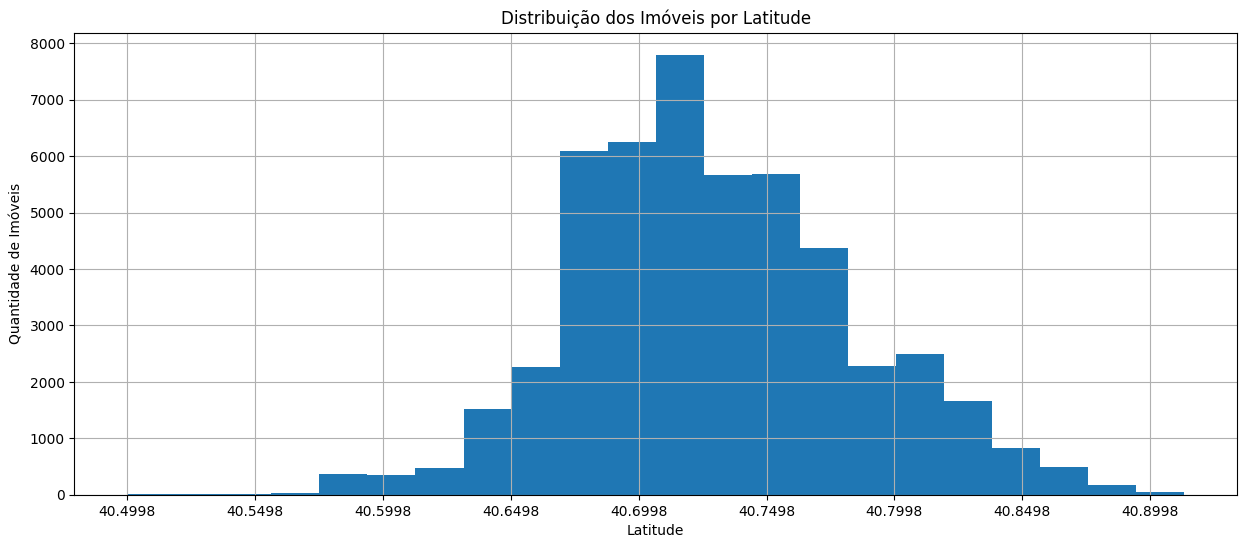

In [90]:
# Crie um histograma da coluna 'latitude'
plt.figure(figsize=(15,  6))
open_data['latitude'].hist(bins='doane')

# Adicione rótulos e título
plt.xlabel('Latitude')
plt.xticks(np.arange(open_data['latitude'].min(), open_data['latitude'].max(),  0.05))
plt.ylabel('Quantidade de Imóveis')
plt.title('Distribuição dos Imóveis por Latitude')

# Mostre o gráfico
plt.show()

Que a maioria dos imóveis ofertados na plataforma ficam entre a latitude 40.65 a 40.75, o que equivaleria a uma faixa mais central da cidade, numa conslta rápida no mpas, na alturea de regiões como a do Brooklin e as regiões sul do Queens e de Lower Manhattan, por exemplo.


11.Quantos identificadores únicos existem na base de dados?

Dois: 'id' que é o identificador único de imóvel e 'host_id' que é o idenfivadfor unico do hoster.

In [109]:
colunas = 'id'
id = open_data.loc[:, colunas]
id_unicos = len( np.unique( id ) )
print( 'O número de IDs únicos(em quantidade): {}'.format( id_unicos ) )


O número de IDs únicos(em quantidade): 48895
